In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import expit 
plt.style.use('ggplot')
%matplotlib inline

[Data](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) import

In [2]:
data = np.genfromtxt(
    '/home/oleg/Programming/Python Code/datasets/cancer.csv',
    skip_header = False, delimiter =',', 
    dtype = None, usecols = (1, 2, 3), names = True)


**Raw data preprocessing**

In [3]:
data['diagnosis'][data['diagnosis'] == b'M'] = 0
data['diagnosis'][data['diagnosis'] == b'B'] = 1


cancer = data['diagnosis'].astype(np.int)

malignant = cancer == 0
bening = cancer == 1

**Scattering data**

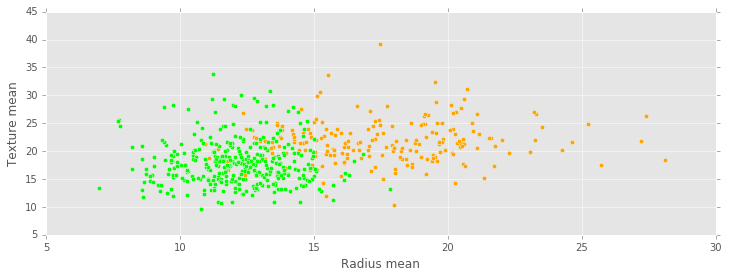

In [4]:
figure, axes = plt.subplots(figsize = (12, 4))
axes.scatter(data['radius_mean'][malignant], 
            data['texture_mean'][malignant], 
            c = 'orange')
axes.scatter(data['radius_mean'][bening], 
            data['texture_mean'][bening],
            c = 'lime')
axes.set_xlabel('Radius mean')
axes.set_ylabel('Texture mean')

**Making an array of data**

In [5]:
X = np.c_[np.ones((data.shape[0], 1)), data['radius_mean'], 
          data['texture_mean']]
y = cancer # target's array

**Calculating cost function**

[Sigmoid](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html#scipy.special.expit)

In [6]:
def cost_function(theta, X, y):
    m = y.size
    h = expit(X.dot(theta)) # sigmoid function
    J = -1 * (1 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))         
    if np.isnan(J): # if h = 0
        return(np.inf)
    return(J)

In [7]:
def gradient(theta, X, y):
    m = y.size
    h = expit(X.dot(theta))
    grad =(1 / m) * X.T.dot(h - y)
    return(grad.flatten())

In [8]:
initial_theta = np.zeros(X.shape[1])
cost = cost_function(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.69314718056
Grad: 
 [-0.12741652 -0.55728383 -1.59519332]


**Cost function optimization using [Least SQuares ](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-slsqp.html#optimize-minimize-slsqp)**

In [9]:
res = minimize(cost_function, initial_theta, args=(X,y), 
               method='SLSQP', options={'maxiter':1000})
res

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


     fun: 0.25582014900741179
     jac: array([  8.28467309e-05,   7.18619674e-04,   1.84591115e-03,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 84
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([ 19.85728276,  -1.05755316,  -0.21822622])

**Prediction**

In [10]:
def predict(theta, X, threshold=0.5):
    p = expit(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

**Calculating accuracy**

In [11]:
p = predict(res.x, X) 
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 89.103690685413%


**Making an array for countor plot**

In [12]:
x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
x2_min, x2_max = X[:, 2].min(), X[:, 2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), 
                       np.linspace(x2_min, x2_max))
h = expit(np.c_[np.ones((xx1.ravel().shape[0], 1)), 
                xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)

**Visualization of classification**

/home/oleg/.local/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/oleg/.local/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


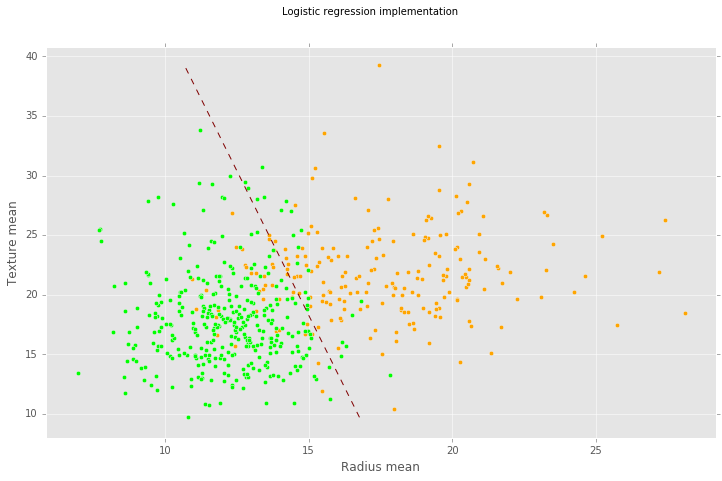

In [13]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.scatter(data['radius_mean'][malignant], 
            data['texture_mean'][malignant], 
            c = 'orange')
ax.scatter(data['radius_mean'][bening], 
            data['texture_mean'][bening],
            c = 'lime')
ax.contour(xx1, xx2, h, [0.5], linewidths = 1, 
            colors='maroon', linestyles = 'dashed')
ax.set_xlabel('Radius mean')
ax.set_ylabel('Texture mean')
fig.suptitle('Logistic regression implementation')